In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
d1 = pd.read_csv('Hyderabad.csv')
d2 = pd.read_csv('Hyd_Rainfall.csv')

In [3]:
df = d1.join(d2)

In [4]:
df.head(10)

index       HURS      HUSS          PSL         TAS       UAS  \
0  1990-01-31  52.687500  0.008631  101265.3125  295.064941 -1.094727   
1  1990-02-28  43.085938  0.007487  101085.3125  297.814941 -0.657227   
2  1990-03-31  32.570312  0.006758  100816.4375  300.302246 -0.425781   
3  1990-04-30  41.804688  0.010282  100714.8125  302.989502 -0.583984   
4  1990-05-31  23.406250  0.006709  100199.4375  306.091064  1.772461   
5  1990-06-30  38.242188  0.011422  100100.8125  305.401611  5.140625   
6  1990-07-31  51.843750  0.013321  100282.0625  302.247070  6.068359   
7  1990-08-31  53.062500  0.013117  100406.4375  301.637207  6.014648   
8  1990-09-30  63.531250  0.014451  100613.3125  300.118652  4.023438   
9  1990-10-31  55.375000  0.012126  101109.9375  300.335938 -1.418945   

        VAS            PR        Rain  
0  1.042969  3.425107e-06    0.000000  
1  1.509766  1.264600e-07   12.849493  
2  1.341797  1.950345e-06   45.314407  
3  1.717773  1.394714e-05    1.983249  
4 -1.251953  7.533129e-07  160.581800  
5 -0.458984  1.703807e-05  165.949899  
6 -0.290039  2.477752e-05  108.600528  
7 -0.448242  1.831482e-05  187.828670  
8 -0.471680  3.052672e-05  106.736699  
9  0.467773  1.358030e-05  154.501964

In [5]:
df['Rain'].describe()

count    240.000000
mean      69.625935
std       88.803937
min        0.000000
25%        1.508641
50%       28.498860
75%      110.339468
max      403.016363
Name: Rain, dtype: float64

In [6]:
filt = df['Rain'] > 400
df[filt]

index       HURS      HUSS         PSL         TAS       UAS  \
200  2006-09-30  73.085938  0.016315  100719.875  299.590576  3.202148   

          VAS        PR        Rain  
200 -1.040039  0.000073  403.016363

In [7]:
correlation = df.corr()

In [8]:
#correlation matrix of the variables
correlation.style.background_gradient(cmap='coolwarm')

In [13]:
from pandas.plotting import scatter_matrix

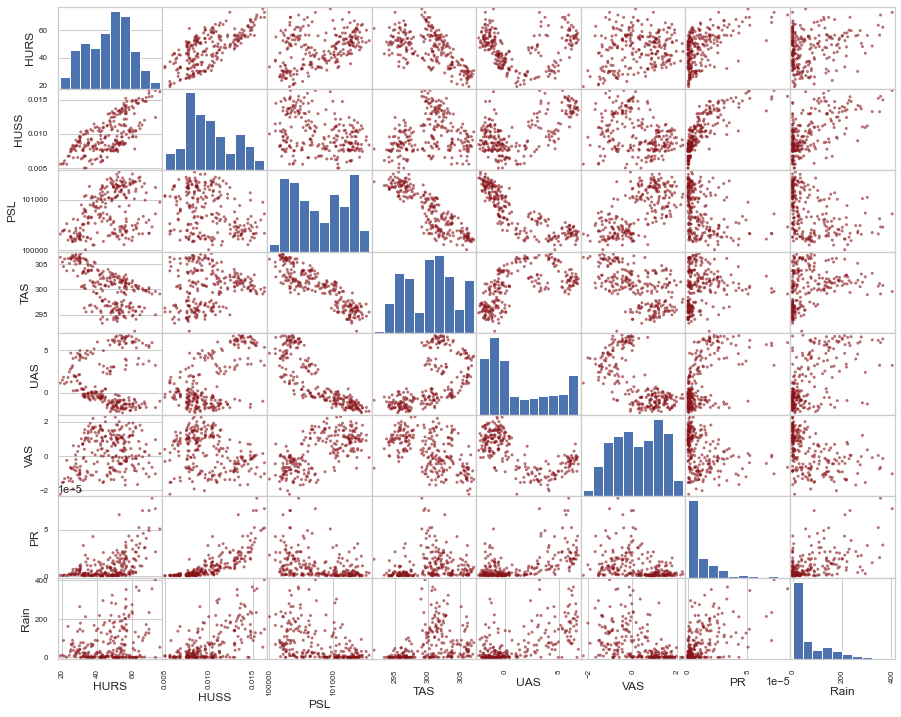

In [15]:
#scatter plots of all the variables
scatter = scatter_matrix(df, figsize= (15, 12), color= '#871217', alpha= 0.6)
plt.savefig('scatter.jpg')

In [17]:
#histogram of rainfall distribution, with the density function
rain_density = sns.distplot(df['Rain'], hist= True, color= '#5534eb', bins= 20,
hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
plt.savefig('rain_density.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [68]:
#boxplot with outliers
rain_box = sns.boxplot(x=df["Rain"], showfliers= True)

In [69]:
#boxplot without outliers
rain_box = sns.boxplot(x=df["Rain"], showfliers= False)

In [70]:
#monthly rainfall from 1990 to 2009
rain_dist = sns.scatterplot(x=df['index'], y= df['Rain'])
rain_dist.set(xlabel='Time 1990-2009 (in months)', ylabel='Rainfall (mm)')

[Text(0.5, 0, 'Time 1990-2009 (in months)'), Text(0, 0.5, 'Rainfall (mm)')]

In [18]:
#dependence on specific and relative humidity
huss_hurs = plt.scatter(x= df['HURS'], y= df['HUSS'], s= df['PR'] * 10e6,
                alpha= 0.7, c= df['Rain'], cmap= 'viridis')
plt.xlabel('Specific Humidity')
plt.ylabel('Relative Humidity')
cbar = plt.colorbar()
plt.savefig('relhum-spehum.jpg')

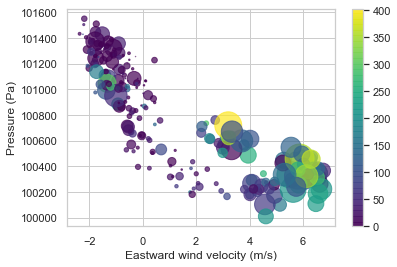

In [20]:
#dependence on pressure and eastward wind
psl_uas = plt.scatter(x= df['UAS'], y= df['PSL'], s= df['PR'] * 10e6,
                alpha= 0.7, c= df['Rain'], cmap= 'viridis')
plt.xlabel('Eastward wind velocity (m/s)')
plt.ylabel('Pressure (Pa)')
cbar = plt.colorbar()
plt.savefig('pressure-eastwind.jpg')

In [21]:
#dependence on pressure and northward wind
psl_vas = plt.scatter(x= df['VAS'], y= df['PSL'], s= df['PR'] * 10e6,
                alpha= 0.7, c= df['Rain'], cmap= 'viridis')
plt.xlabel('Northward wind velocity (m/s)')
plt.ylabel('Pressure (Pa)')
cbar = plt.colorbar()
plt.savefig('pressure-northwind.jpg')

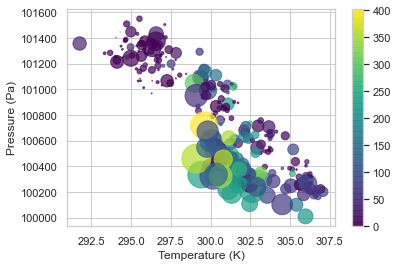

In [19]:
#dependence on pressure and northward wind
psl_tas = plt.scatter(x= df['TAS'], y= df['PSL'], s= df['PR'] * 10e6,
                alpha= 0.7, c= df['Rain'], cmap= 'viridis')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Pa)')
cbar = plt.colorbar()
plt.savefig('pressure-temperature.jpg')